In [1]:
import sys
import os
import math

sys.path.insert(0,'../../..')
sys.path.insert(0,'../../../py')
import parameters
import utilities
from spectrogram_utilities import spectrogram_plot
import output_utilities
from spectrogram_output_visualiser import spectrogram_cut, spectrogram_cut_augmented, spectrogram_and_output

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats, misc
from PIL import Image
from sklearn import preprocessing

# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]

2013-04-04UT02:30:14.52335656.marion.vr2


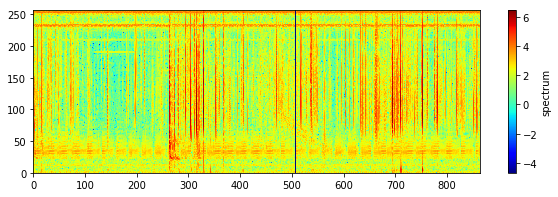

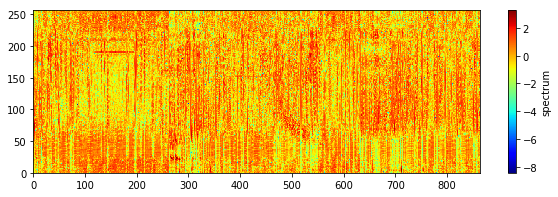

508 [46, 100, 456, 560]
560 [19, 73, 508, 612]
456 [73, 128, 404, 508]
(257, 863)
2 2


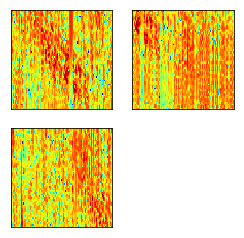

5 5


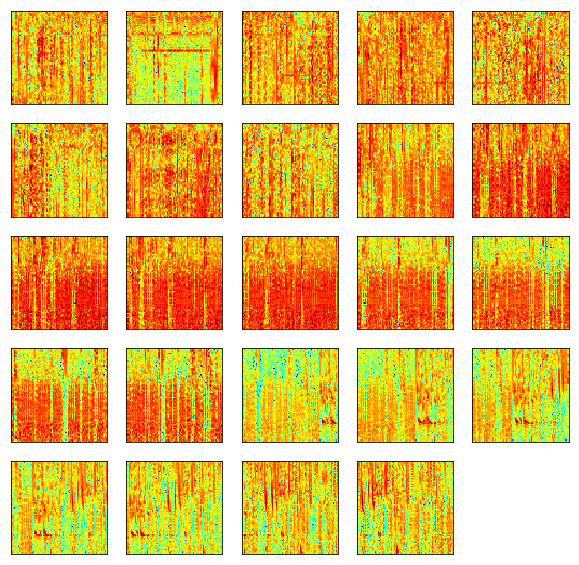

In [50]:
file = utilities.random_file(awd_event, site)
# file = '2013-05-28UT14:08:19.75372164.marion.vr2'
# file = '2012-09-03UT07:01:30.31558125.sanae.vr2'
# file = '2013-07-29UT14:20:35.28291914.marion.vr2'

print(file)

# display spectrograms
indices, time, freq , spectrogram = spectrogram_and_output(awd_event,site, file,zscore=False,output=True)
spectrogram_plot(spectrogram, size=(10,3))
indices, time, freq , spectrogram = spectrogram_and_output(awd_event,site, file,zscore=True,output=False)
spectrogram_plot(spectrogram, size=(10,3))

# generate cuts
# indices, spectrogram, specs_cuts, noise_cuts, f_cut_length, t_cut_length = spectrogram_cut(
#     awd_event, site, file, threshold=10, zscore=True, output=False,
#     time_lower_boundary = 0.3,
#     time_upper_boundary = 0.9,
#     freq_upper_boundary = 10000,
#     freq_lower_boundary = 1500)

indices, spectrogram, specs_cuts, noise_cuts, f_cut_length, t_cut_length = spectrogram_cut_augmented(
    awd_event, site, file, threshold=50, zscore=True, output=False)

print(spectrogram.shape)

# if specs_cuts.size!=0 and noise_cuts.size!=0:
#     cuts = np.append(specs_cuts, noise_cuts, axis=0)
# elif specs_cuts.size==0:
#     cuts = noise_cuts
# elif noise_cuts.size==0:
#     cuts=specs_cuts
# else:
#     cuts = np.array([], dtype=float64)
   
cuts = specs_cuts.copy()
x_size = math.ceil(math.sqrt(len(cuts)))
y_size = math.ceil(len(cuts)/x_size)
print(x_size, y_size)

plt.figure(figsize=(y_size*2,x_size*2))
for i in range(len(cuts)):
    plt.subplot(x_size, y_size,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    spec = spectrogram[cuts[i][0]:cuts[i][1],cuts[i][2]:cuts[i][3]]
    spec = Image.fromarray(spec).resize((parameters.clf_input_height,parameters.clf_input_width))
    spec = np.array(spec)
    plt.pcolormesh(spec, cmap='jet')
plt.show()

cuts = noise_cuts.copy()
x_size = math.ceil(math.sqrt(len(cuts)))
y_size = math.ceil(len(cuts)/x_size)
print(x_size, y_size)

plt.figure(figsize=(y_size*2,x_size*2))
for i in range(len(cuts)):
    plt.subplot(x_size, y_size,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    spec = spectrogram[cuts[i][0]:cuts[i][1],cuts[i][2]:cuts[i][3]]
    spec = Image.fromarray(spec).resize((parameters.clf_input_height,parameters.clf_input_width))
    spec = np.array(spec)
    plt.pcolormesh(spec, cmap='jet')
plt.show()

# Errors
# 2012-09-03UT07:01:30.31558125.sanae.vr2
# 2012-07-08UT05:55:47.30118125.sanae.vr2
# 2013-07-23UT16:48:01.46531906.marion.vr2

# Long tails
# 2013-07-29UT14:10:55.64771914.marion.vr2
# 2013-07-07UT06:24:51.69251914.marion.vr2

# Long sample
# 2013-06-09UT16:58:04.75447109.marion.vr2

# False positive due to Output
# 2012-08-31UT09:48:32.30598125.sanae.vr2
# 2012-08-25UT06:38:38.15558125.sanae.vr2
# 2013-06-09UT16:02:00.14647109.marion.vr2

# False positive Due to Spectrogram cuts
# 2012-07-07UT09:22:49.95718125.sanae.vr2
# 2013-06-09UT17:34:28.02487109.marion.vr2
